#### 1.Data Exploration:
a.Load the dataset and perform exploratory data analysis(EDA)

b.Examine the features, their types, & summary statistics

c. create visualizations such as histograms, box plots, or pair plots to visualize the distributions & relationships between features.

Analyze any patterns or correlations observed in the data

In [1]:
#load the libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
df_train=pd.read_csv('Titanic_train.csv')
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df_test=pd.read_csv('Titanic_test.csv')
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df_train.shape

(891, 12)

In [6]:
df_test.shape

(418, 11)

In [7]:
df_test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
df_train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [13]:
# df_train :- Age , Cabin , Embarked :- missing values
# df_test :- Age , Fare , Cabin 

In [14]:
df_train['PassengerId'].value_counts()

PassengerId
891    1
1      1
2      1
3      1
4      1
      ..
16     1
15     1
14     1
13     1
12     1
Name: count, Length: 891, dtype: int64

In [15]:
df_test['PassengerId'].value_counts()

PassengerId
1309    1
892     1
1293    1
1292    1
1291    1
       ..
898     1
897     1
896     1
895     1
894     1
Name: count, Length: 418, dtype: int64

In [16]:
df_train['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [17]:
df_test['Pclass'].value_counts()

Pclass
3    218
1    107
2     93
Name: count, dtype: int64

In [18]:
df_train['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [19]:
df_test['Sex'].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

In [20]:
df_train['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [21]:
df_test['SibSp'].value_counts()

SibSp
0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: count, dtype: int64

In [22]:
df_train['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [23]:
df_test['Parch'].value_counts()

Parch
0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: count, dtype: int64

In [24]:
df_train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [25]:
df_train['Cabin'].value_counts()

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64

In [26]:
df_test['Embarked'].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

#### 2.Data Preprocessing

a. Handle missing values (e.g.,imputation)

b.Encode categorical variables.

In [27]:
label_encoder = LabelEncoder()

# Apply LabelEncoder to the specific column
df_train['Cabin'] = label_encoder.fit_transform(df_train['Cabin'])
df_train['Embarked'] = label_encoder.fit_transform(df_train['Embarked'])
df_train['Sex'] = label_encoder.fit_transform(df_train['Sex'])
df_train['Ticket'] = label_encoder.fit_transform(df_train['Ticket'])

In [28]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,523,7.2500,147,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,596,71.2833,81,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,669,7.9250,147,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,49,53.1000,55,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,472,8.0500,147,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,101,13.0000,147,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,14,30.0000,30,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,675,23.4500,147,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,8,30.0000,60,0


In [29]:
label_encoder = LabelEncoder()

# Apply LabelEncoder to the specific column
df_test['Cabin'] = label_encoder.fit_transform(df_test['Cabin'])
df_test['Embarked'] = label_encoder.fit_transform(df_test['Embarked'])
df_test['Sex'] = label_encoder.fit_transform(df_test['Sex'])
df_test['Ticket'] = label_encoder.fit_transform(df_test['Ticket'])

In [30]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,152,7.8292,76,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,221,7.0000,76,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,73,9.6875,76,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,147,8.6625,76,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,138,12.2875,76,2
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,NaN,0,0,267,8.0500,76,2
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,324,108.9000,22,0
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,346,7.2500,76,2
416,1308,3,"Ware, Mr. Frederick",1,NaN,0,0,220,8.0500,76,2


In [31]:
df_train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,338.528620,32.204208,130.744108,1.538721
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,200.850657,49.693429,36.024237,0.794231
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,158.500000,7.910400,147.000000,1.000000
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,337.000000,14.454200,147.000000,2.000000
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,519.500000,31.000000,147.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,680.000000,512.329200,147.000000,3.000000


In [32]:
df_test.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,418.000000,417.000000,418.000000,418.000000
mean,1100.500000,2.265550,0.636364,30.272590,0.447368,0.392344,180.944976,35.627188,67.437799,1.401914
std,120.810458,0.841838,0.481622,14.181209,0.896760,0.981429,107.533763,55.907576,19.091405,0.854496
min,892.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,0.000000,21.000000,0.000000,0.000000,85.250000,7.895800,76.000000,1.000000
50%,1100.500000,3.000000,1.000000,27.000000,0.000000,0.000000,181.000000,14.454200,76.000000,2.000000
75%,1204.750000,3.000000,1.000000,39.000000,1.000000,0.000000,279.750000,31.500000,76.000000,2.000000
max,1309.000000,3.000000,1.000000,76.000000,8.000000,9.000000,362.000000,512.329200,76.000000,2.000000


In [33]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

In [34]:
df_test.isna().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Cabin           0
Embarked        0
dtype: int64

In [35]:
df_train.duplicated().sum()

np.int64(0)

In [36]:
df_test.duplicated().sum()

np.int64(0)

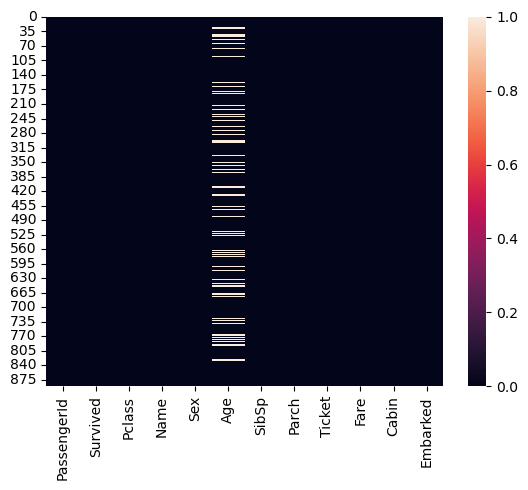

In [37]:
# visualize the missing values:-

sns.heatmap(df_train.isna())
plt.show()
# white horizontals are missing values

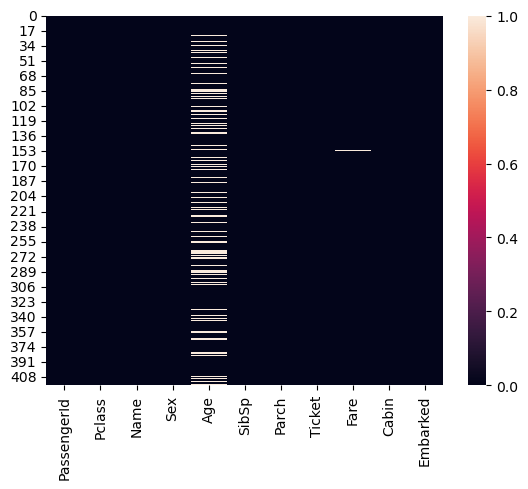

In [38]:
# visualize the missing values:-

sns.heatmap(df_test.isna())  
plt.show()
# white horizontals are missing values

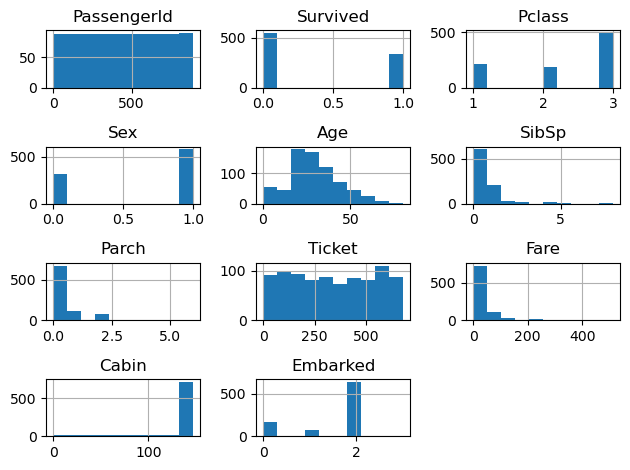

In [39]:
df_train.hist()
plt.tight_layout()
plt.show()

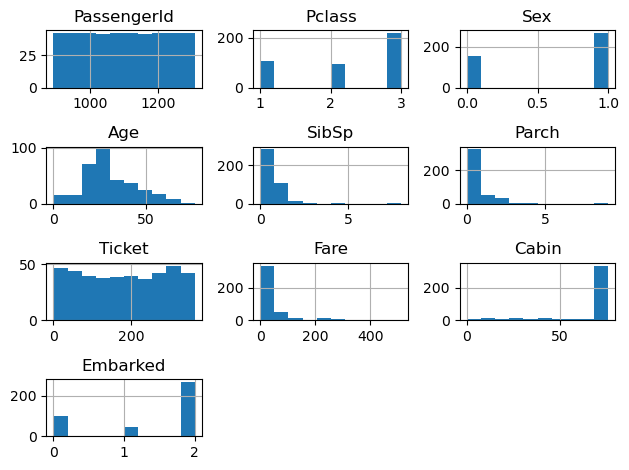

In [40]:
df_test.hist()
plt.tight_layout()
plt.show()

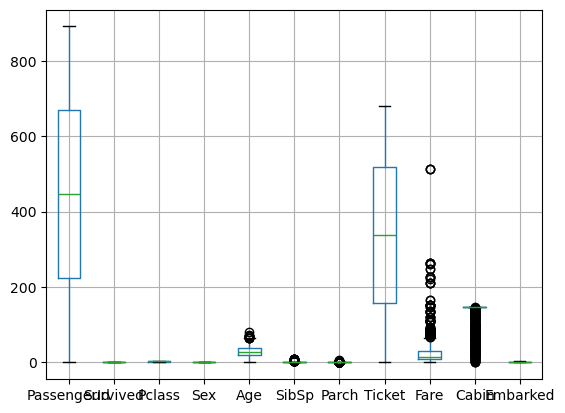

In [41]:
df_train.boxplot()
plt.show()

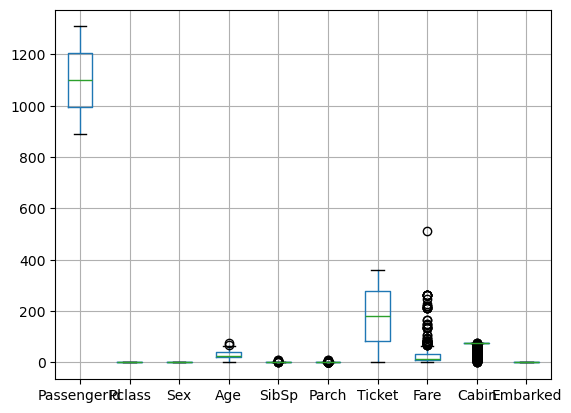

In [42]:
df_test.boxplot()
plt.show()

In [43]:
df_train['Age'].fillna(df_train['Age'].median(),inplace=True)

In [44]:
df_test['Age'].fillna(df_test['Age'].median(),inplace=True)

In [45]:
df_test['Fare'].fillna(df_test['Fare'].median(),inplace=True)

In [46]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [47]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [48]:
# all missing values are treated

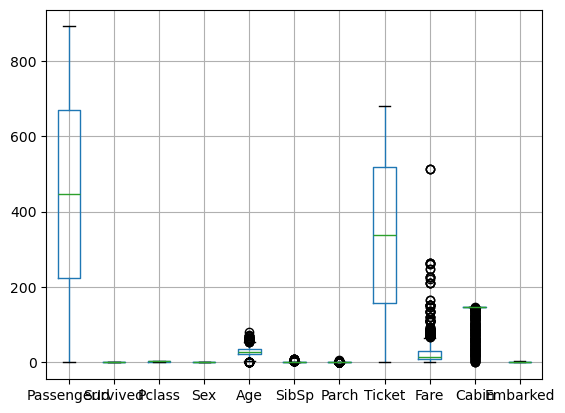

In [49]:
df_train.boxplot()
plt.show()

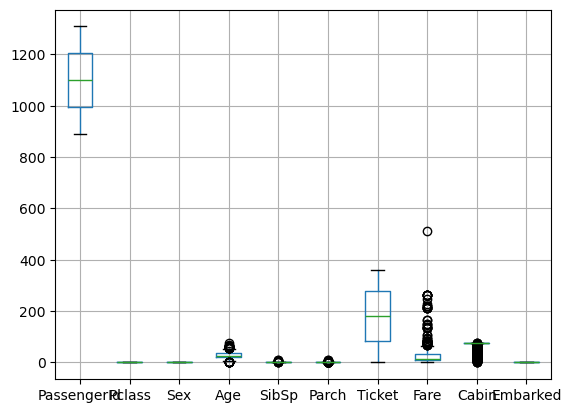

In [50]:
df_test.boxplot()
plt.show()

In [51]:
# treating  outliers :- using capping 

In [52]:
def outlier_detection(data,colname):
    q1 = data[colname].quantile(0.25)
    q3 = data[colname].quantile(0.75)
    iqr = q3-q1

    upper_extreme = q3 + (1.5*iqr)
    lower_extreme = q1 - (1.5*iqr)

    return print('lower_extreme:-',lower_extreme,', upper_extreme:-',upper_extreme,', q1:-',q1,', q3:-',q3)

In [53]:
outlier_detection(df_train,'Age')

lower_extreme:- 2.5 , upper_extreme:- 54.5 , q1:- 22.0 , q3:- 35.0


In [54]:
df_train.loc[df_train['Age']>54.5,'Age'] = 54.5

In [55]:
df_train.loc[df_train['Age']<2.5,'Age'] = 2.5

In [56]:
outlier_detection(df_train,'SibSp')

lower_extreme:- -1.5 , upper_extreme:- 2.5 , q1:- 0.0 , q3:- 1.0


In [57]:
df_train.loc[df_train['SibSp']>2.5,'SibSp'] = 2.5

In [58]:
df_train.loc[df_train['SibSp']<-1.5,'SibSp'] =  -1.5

In [59]:
outlier_detection(df_train,'Parch')

lower_extreme:- 0.0 , upper_extreme:- 0.0 , q1:- 0.0 , q3:- 0.0


In [60]:
df_train.loc[df_train['Parch']>0.0,'Parch'] = 0.0

In [61]:
df_train.loc[df_train['Parch']<0.0,'Parch'] = 0.0


In [62]:
outlier_detection(df_train,'Fare')

lower_extreme:- -26.724 , upper_extreme:- 65.6344 , q1:- 7.9104 , q3:- 31.0


In [63]:
df_train.loc[df_train['Fare']>65.6344,'Fare'] = 65.6344

In [64]:
df_train.loc[df_train['Fare']<-26.724,'Fare'] = -26.724

In [65]:
outlier_detection(df_train,'Cabin')


lower_extreme:- 147.0 , upper_extreme:- 147.0 , q1:- 147.0 , q3:- 147.0


In [66]:
df_train.loc[df_train['Cabin']>147.0,'Cabin'] = 147.0


In [67]:
df_train.loc[df_train['Cabin']<147.0,'Cabin'] = 147.0

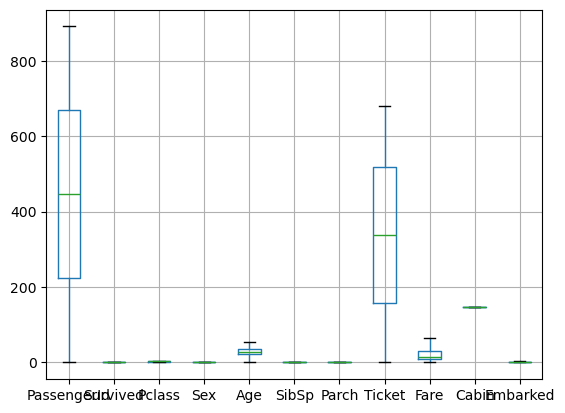

In [68]:
df_train.boxplot()
plt.show()

In [69]:
df_train['Cabin'].value_counts()   # drop this column

Cabin
147    891
Name: count, dtype: int64

In [70]:
df_train['Parch'].value_counts()     # drop this column

Parch
0    891
Name: count, dtype: int64

In [71]:
df_train.drop(columns=['Cabin','Parch','Name'],inplace =True)

In [72]:
df_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Ticket,Fare,Embarked
0,1,0,3,1,22.0,1.0,523,7.2500,2
1,2,1,1,0,38.0,1.0,596,65.6344,0
2,3,1,3,0,26.0,0.0,669,7.9250,2
3,4,1,1,0,35.0,1.0,49,53.1000,2
4,5,0,3,1,35.0,0.0,472,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0.0,101,13.0000,2
887,888,1,1,0,19.0,0.0,14,30.0000,2
888,889,0,3,0,28.0,1.0,675,23.4500,2
889,890,1,1,1,26.0,0.0,8,30.0000,0


In [73]:
# treating outliers :- df_test 

In [74]:
outlier_detection(df_test,'Age')

lower_extreme:- 3.875 , upper_extreme:- 54.875 , q1:- 23.0 , q3:- 35.75


In [75]:
df_test.loc[df_test['Age']>54.875,'Age'] = 54.875

In [76]:
df_test.loc[df_test['Age']<3.875 ,'Age'] = 3.875

In [77]:
outlier_detection(df_test,'SibSp')

lower_extreme:- -1.5 , upper_extreme:- 2.5 , q1:- 0.0 , q3:- 1.0


In [78]:
df_test.loc[df_test['SibSp']>2.5,'SibSp'] = 2.5

In [79]:
df_test.loc[df_test['SibSp']<-1.5,'SibSp'] =  -1.5

In [80]:
outlier_detection(df_test,'Parch')

lower_extreme:- 0.0 , upper_extreme:- 0.0 , q1:- 0.0 , q3:- 0.0


In [81]:
df_test.loc[df_test['Parch']>0.0,'Parch'] = 0.0

In [82]:
df_test.loc[df_test['Parch']<0.0,'Parch'] = 0.0

In [83]:
outlier_detection(df_test,'Fare')

lower_extreme:- -27.468312499999996 , upper_extreme:- 66.8359875 , q1:- 7.8958 , q3:- 31.471875


In [84]:
df_test.loc[df_test['Fare']>66.8359875,'Fare'] =66.8359875

In [85]:
df_test.loc[df_test['Fare']<-27.468312499999996,'Fare'] = -27.468312499999996

In [86]:
outlier_detection(df_test,'Cabin')

lower_extreme:- 76.0 , upper_extreme:- 76.0 , q1:- 76.0 , q3:- 76.0


In [87]:
df_test.loc[df_test['Cabin']>76.0,'Cabin'] = 76.0

In [88]:
df_test.loc[df_test['Cabin']<76.0,'Cabin'] = 76.0

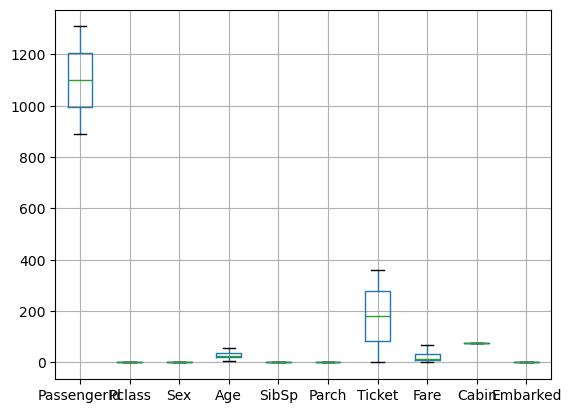

In [89]:
df_test.boxplot()
plt.show()

In [90]:
df_test['Cabin'].value_counts()   # drop this column

Cabin
76    418
Name: count, dtype: int64

In [91]:
df_test['Parch'].value_counts()   # drop this column

Parch
0    418
Name: count, dtype: int64

In [92]:
df_test.drop(columns=['Cabin','Parch','Name'],inplace =True)

In [93]:
df_test

,PassengerId,Pclass,Sex,Age,SibSp,Ticket,Fare,Embarked
0,892,3,1,34.500,0.0,152,7.829200,1
1,893,3,0,47.000,1.0,221,7.000000,2
2,894,2,1,54.875,0.0,73,9.687500,1
3,895,3,1,27.000,0.0,147,8.662500,2
4,896,3,0,22.000,1.0,138,12.287500,2
...,...,...,...,...,...,...,...,...
413,1305,3,1,27.000,0.0,267,8.050000,2
414,1306,1,0,39.000,0.0,324,66.835988,0
415,1307,3,1,38.500,0.0,346,7.250000,2
416,1308,3,1,27.000,0.0,220,8.050000,2


In [94]:
# Correlation Analysis

In [95]:
df_train.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Ticket,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.036636,-0.072778,-0.056554,0.003243,0.013083
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.060622,0.031434,-0.164549,0.317430,-0.163517
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.340404,0.023180,0.319869,-0.715300,0.157112
Sex,0.042939,-0.543351,0.131900,1.000000,0.074740,-0.167885,0.059372,-0.234969,0.104057
Age,0.036636,-0.060622,-0.340404,0.074740,1.000000,-0.247806,-0.075043,0.144544,-0.014104
SibSp,-0.072778,0.031434,0.023180,-0.167885,-0.247806,1.000000,0.032401,0.349615,0.036526
Ticket,-0.056554,-0.164549,0.319869,0.059372,-0.075043,0.032401,1.000000,-0.140403,-0.006041
Fare,0.003243,0.317430,-0.715300,-0.234969,0.144544,0.349615,-0.140403,1.000000,-0.193396
Embarked,0.013083,-0.163517,0.157112,0.104057,-0.014104,0.036526,-0.006041,-0.193396,1.000000


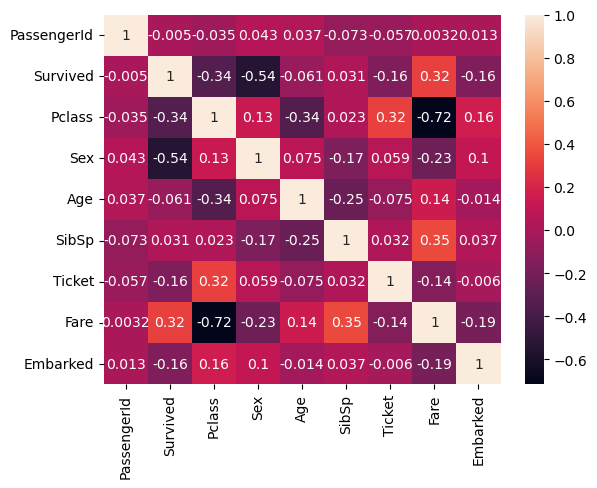

In [96]:
sns.heatmap(df_train.corr(),annot=True)
plt.show()

#### 3.Model Building:

a.Build a logistic regression model using appropriate libraries(e.g.,scikit-learn)

b.Train the model using the training data

In [97]:
df_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Ticket,Fare,Embarked
0,1,0,3,1,22.0,1.0,523,7.2500,2
1,2,1,1,0,38.0,1.0,596,65.6344,0
2,3,1,3,0,26.0,0.0,669,7.9250,2
3,4,1,1,0,35.0,1.0,49,53.1000,2
4,5,0,3,1,35.0,0.0,472,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0.0,101,13.0000,2
887,888,1,1,0,19.0,0.0,14,30.0000,2
888,889,0,3,0,28.0,1.0,675,23.4500,2
889,890,1,1,1,26.0,0.0,8,30.0000,0


In [98]:
# dividing our data into input and output variables

In [99]:
x = df_train.drop('Survived', axis=1)

In [100]:
x #independent variables

,PassengerId,Pclass,Sex,Age,SibSp,Ticket,Fare,Embarked
0,1,3,1,22.0,1.0,523,7.2500,2
1,2,1,0,38.0,1.0,596,65.6344,0
2,3,3,0,26.0,0.0,669,7.9250,2
3,4,1,0,35.0,1.0,49,53.1000,2
4,5,3,1,35.0,0.0,472,8.0500,2
...,...,...,...,...,...,...,...,...
886,887,2,1,27.0,0.0,101,13.0000,2
887,888,1,0,19.0,0.0,14,30.0000,2
888,889,3,0,28.0,1.0,675,23.4500,2
889,890,1,1,26.0,0.0,8,30.0000,0


In [101]:
y=df_train[['Survived']]

In [102]:
y #dependent variables

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [103]:
df_test

,PassengerId,Pclass,Sex,Age,SibSp,Ticket,Fare,Embarked
0,892,3,1,34.500,0.0,152,7.829200,1
1,893,3,0,47.000,1.0,221,7.000000,2
2,894,2,1,54.875,0.0,73,9.687500,1
3,895,3,1,27.000,0.0,147,8.662500,2
4,896,3,0,22.000,1.0,138,12.287500,2
...,...,...,...,...,...,...,...,...
413,1305,3,1,27.000,0.0,267,8.050000,2
414,1306,1,0,39.000,0.0,324,66.835988,0
415,1307,3,1,38.500,0.0,346,7.250000,2
416,1308,3,1,27.000,0.0,220,8.050000,2


In [104]:
# Logistic regression and fit the model 

model = LogisticRegression() 
# initialize the model i.e. called instance creation of class object.
# First create object 'classifier' for class LogisticRegression

In [105]:
model.fit(x,y)

LogisticRegression()

In [106]:
#Predict for X dataset
y_pred = model.predict(df_test)

In [107]:
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,

In [108]:
y_pred_D=pd.DataFrame(y_pred)

In [109]:
y_pred_D

,0
0,0
1,0
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [110]:
y_pred_D.shape

(418, 1)

In [111]:
y.shape

(891, 1)

In [112]:
y_drop = y.sample(n=473,random_state=42).index

In [113]:
y_drop_rows = y.drop(y_drop)

In [114]:
y_drop_rows

,Survived
1,1
4,0
8,1
13,0
14,0
...,...
878,0
883,0
887,1
888,0


In [115]:
x_drop = x.sample(n=473,random_state=42).index

In [116]:
x_drop_rows = x.drop(x_drop)
x_drop_rows

,PassengerId,Pclass,Sex,Age,SibSp,Ticket,Fare,Embarked
1,2,1,0,38.0,1.0,596,65.6344,0
4,5,3,1,35.0,0.0,472,8.0500,2
8,9,3,0,27.0,0.0,344,11.1333,2
13,14,3,1,39.0,1.0,333,31.2750,2
14,15,3,0,14.0,0.0,413,7.8542,2
...,...,...,...,...,...,...,...,...
878,879,3,1,28.0,0.0,363,7.8958,2
883,884,2,1,28.0,0.0,565,10.5000,2
887,888,1,0,19.0,0.0,14,30.0000,2
888,889,3,0,28.0,1.0,675,23.4500,2


In [117]:
# For model evaluation :- 1st method:- confusion matrix
   #                       2nd method:- ROC Curve 

In [118]:
# Confusion Matrix for the model accuracy  TP   FP
#                                          FN   TN
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_drop_rows,y_pred)
print (confusion_matrix)

[[153 111]
 [ 90  64]]


In [119]:
((153+64)/(153+111+90+64))*100 #Accuracy

51.91387559808612

In [120]:
# by using confusion matrix :- we got accuracy as 51 %

#### 4.Model Evaluation:

a. Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score. 
Visualize the ROC curve.

In [121]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
print("Accuracy:", accuracy_score(y_drop_rows, y_pred_D))
print("Precision:", precision_score(y_drop_rows, y_pred_D))
print("Recall:", recall_score(y_drop_rows, y_pred_D))
print("F1-score:", f1_score(y_drop_rows, y_pred_D))
print("ROC-AUC score:", roc_auc_score(y_drop_rows, y_pred_D))

Accuracy: 0.5191387559808612
Precision: 0.3657142857142857
Recall: 0.4155844155844156
F1-score: 0.3890577507598784
ROC-AUC score: 0.49756493506493515


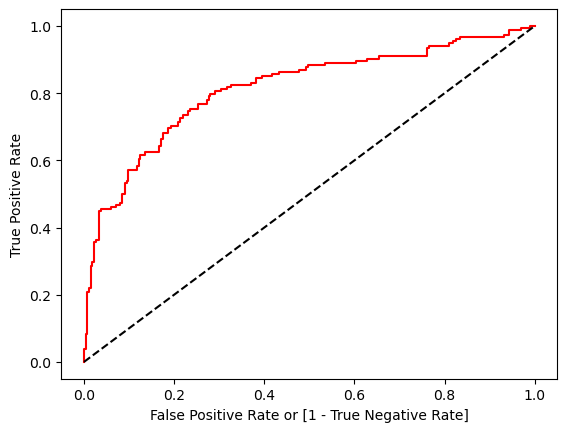

In [122]:
from sklearn.metrics import roc_curve #roc-receiver operating characteristic
from sklearn.metrics import roc_auc_score # auc-area under curve

fpr, tpr, thresholds = roc_curve(y_drop_rows, model.predict_proba(x_drop_rows)[:,1])   # here 1 means ..... success ..i.e probability of 1 
# roc_curve :- returns 3 values
# we want to predict probability values for x data
# predict_proba returns probability estimates for all classes i.e 0 and 1.
# and the results are ordered by the label of classes i.e. 0 and 1.
# [:,1] will get the predicted probabilities of the positive label only
# here we will get false positive rate, true positive rate and threshold values
auc = roc_auc_score(y_drop_rows, y_pred_D)# compute roc_auc_score based on y and y predicted

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red')  # fpr :- on x-axis , tpr:- on y-axis
plt.plot([0, 1], [0, 1], 'k--')# x axis range is 0 to 1, y axis range is 0 to 1, k-- is a line type - dotted
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show() # red one is roc curve

In [123]:
auc

np.float64(0.49756493506493515)

In [124]:
# by using ROC curve :- we got accuracy as 49 %

#### 5.Interpretation:

a. Interpret the coefficients of the logistic regression model.

b. Discuss the significance of features in predicting the target variable (survival probability in this case).

In [125]:
print(model.coef_)

[[ 4.94509298e-04 -8.05050158e-02 -2.37867760e+00 -2.05541529e-02
  -8.17386214e-01 -8.84267156e-04  4.23392817e-02  7.25690129e-02]]


In [126]:
#Positive coefficients: Features positively correlated with survival.
#Negative coefficients: Features negatively correlated with survival.
#features :- PassengerId	, Pclass ,	Sex , Age, SibSp ,Ticket ,Fare, Embarked

#### 6.Deployment with Streamlit:

In this task, you will deploy your logistic regression model using Streamlit. The deployment can be done locally or online via Streamlit Share. Your task includes creating a Streamlit app in Python that involves loading your trained model and setting up user inputs for predictions.

In [127]:
from pickle import dump

In [128]:
dump(model,open('logistic.pkl','wb'))

### Q1. What is the difference between precision and recall?

Precision = TP / (TP + FP)
- It measures how many of the positively predicted cases were actually positive.
- Useful when false positives are costly (e.g., spam filter).

Recall = TP / (TP + FN)
- It measures how many actual positives were captured.
- Useful when false negatives are costly (e.g., disease detection).

 F1 Score balances both: 2 * (Precision * Recall) / (Precision + Recall)


### Q2. What is cross-validation, and why is it important in binary classification?

Cross-validation is a technique to assess model performance by splitting data into multiple train/test folds.
Example: k-fold CV splits data into k parts and trains k models.

Importance:
- Reduces overfitting risk
- Gives more robust performance estimate
- Helps tune hyperparameters effectively